Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Figure for Geometry with reflective lens and absorbing rest.

MFPT:  1.8925599208333335 days
Proportion of exits through hyaloid:  0.315
Proportion of exits through ILM:  0.685


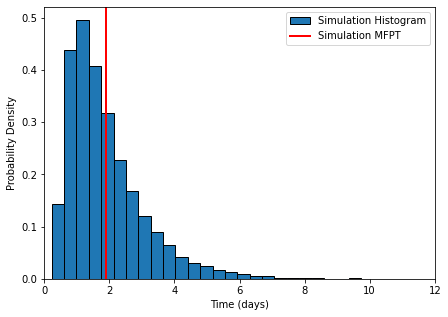

the mode:1.1804273648648649 days


In [7]:
## Importing data and looking at mean values and proportions
data = np.genfromtxt("data/fpt_array_geomB_philens0.25_31-01-2023_deltat0.001.csv", delimiter=",")
fpt = data[:,0]
exit = data[:,1]

#pde_mfpt_mean = 1.8756  # Geometry A
#pde_mfpt_mean = 1.9453 # Geom B
#pde_mfpt_mean = 2.0027 # Geom C

# Looking at mean first passage time
fpt_mean = np.nanmean(fpt)
# Looking at proportion of exit from hyaloid and ilm
prop_hya = np.count_nonzero(exit == 0)/np.count_nonzero(~np.isnan(exit))
prop_ilm = np.count_nonzero(exit == 1)/np.count_nonzero(~np.isnan(exit))

print('MFPT: ', fpt_mean/24, 'days')
print('Proportion of exits through hyaloid: ', prop_hya)
print('Proportion of exits through ILM: ', prop_ilm)

# Plot histogram without NaN values.
fpt_days = fpt/24
# Plot histogram without NaN values.
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
n, bins, patches = ax.hist(fpt_days[~np.isnan(fpt_days)], bins=37, density=True, edgecolor = "black", label = 'Simulation Histogram')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Probability Density')
plt.axvline(x=fpt_mean/24, color='red', linestyle='-', linewidth=2, label = 'Simulation MFPT')
#plt.axvline(x=pde_mfpt_mean, color='black', linestyle='--', linewidth=2, label = 'PDE MFPT')
ax.set_xlim([0, 12])
plt.legend()
#plt.savefig('fpt_pdf_geom1_p1_05-12-2022_days.eps', format='eps')
plt.show()

mode_index = n.argmax()
print('the mode:'+ str((bins[mode_index] + bins[mode_index+1])/2), 'days')

In [ ]:
data = np.genfromtxt("time_array_geom0_20-01-2023_tests.csv", delimiter=",")
time = data
for n in [1, len(time)-2]:
    if time[n+1] - time[n] != 0:
        print(time[n], time[n+1])

#### Figure comparing avg FPT for Geometries A and B depending on time step 

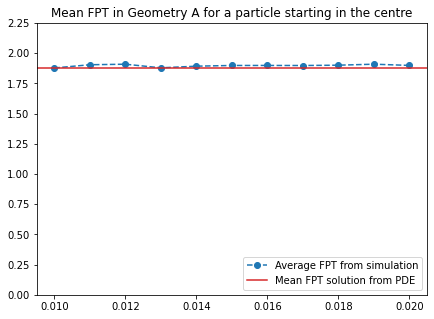

Text(0.5, 1.0, 'Mean FPT in Geometry A and B for a particle starting in the centre')

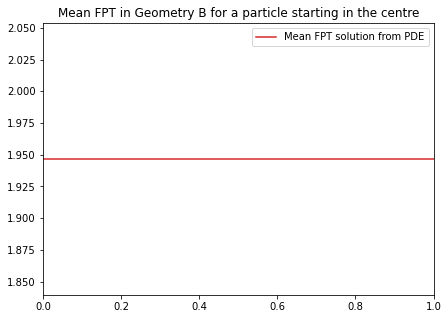

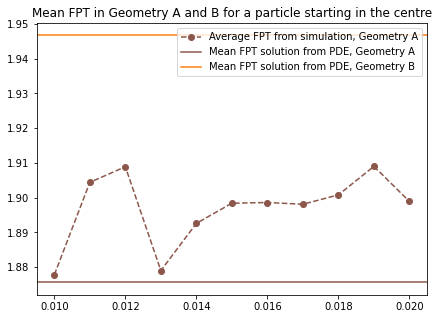

In [8]:
# For Geometry A the sphere with absorbing boundary conditions,
# Geometry B the sphere with reflective boundary condition for
# the lens section and absorbing boundary condition for the rest
# of the eye, we obtained the following average FPT:
avg_fpt_geomA = [1.8778, 1.9044, 1.9089, 1.879, 1.8926, 1.8984, 1.8986, 1.8981, 1.9008, 1.909, 1.8989]
avg_fpt_geomB = [2.3667, 2.1368, 1.9734, 1.7764]
delta_t = [0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.020]

# While the values obtained through the PDE are
mfpt_geomA = 1.8756
mfpt_geomB = 1.9467

# Plot A
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
ax.plot(delta_t, avg_fpt_geomA, marker='o', color='C0', linestyle='dashed', label='Average FPT from simulation')
plt.axhline(y=mfpt_geomA, color='C3', label='Mean FPT solution from PDE')
plt.legend(loc='lower right')
plt.ylim((0,2.25))
plt.title('Mean FPT in Geometry A for a particle starting in the centre')
plt.show()

# Plot B
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
#ax.plot(delta_t, avg_fpt_geomB, marker='o', color='C0',linestyle='dashed', label='Average FPT from simulation')
plt.axhline(y=mfpt_geomB, color='C3', label='Mean FPT solution from PDE')
plt.legend()
plt.title('Mean FPT in Geometry B for a particle starting in the centre')
#plt.show()

# Plot together 
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
ax.plot(delta_t, avg_fpt_geomA, marker='o', color='C5', linestyle='dashed', label='Average FPT from simulation, Geometry A')
#ax.plot(delta_t, avg_fpt_geomB, marker='o', color='C1',linestyle='dashed', label='Average FPT from simulation, Geometry B')
plt.axhline(y=mfpt_geomA, color='C5', label='Mean FPT solution from PDE, Geometry A')
plt.axhline(y=mfpt_geomB, color='C1', label='Mean FPT solution from PDE, Geometry B')
plt.legend()
plt.title('Mean FPT in Geometry A and B for a particle starting in the centre')
#plt.show()

Text(0, 0.5, 'First passage time (days)')

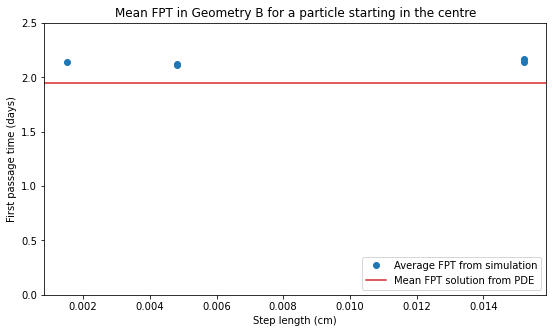

In [9]:
# For Geometry A the sphere with absorbing boundary conditions,
# Geometry B the sphere with reflective boundary condition for
# the lens section and absorbing boundary condition for the rest
# of the eye, we obtained the following average FPT:
avg_fpt_geomB = [2.1373, 2.1110, 2.1234, 2.1716, 2.1424]
delta_t = [0.0001, 0.001, 0.001, 0.01, 0.01]
diff_coef = 3.852e-3 
delta_x = [np.sqrt(6*diff_coef*0.0001), np.sqrt(6*diff_coef*0.001), np.sqrt(6*diff_coef*0.001), np.sqrt(6*diff_coef*0.01), np.sqrt(6*diff_coef*0.01)]

# While the values obtained through the PDE are
mfpt_geomB = 1.9467

# Plot B
fig,ax = plt.subplots(1,1)
fig.set_size_inches(9,5)
ax.plot(delta_x, avg_fpt_geomB, marker='o', color='C0', linestyle="None", label='Average FPT from simulation')
plt.axhline(y=mfpt_geomB, color='C3', label='Mean FPT solution from PDE')
#plt.xscale('log')
plt.ylim([0,2.5])
plt.legend(loc='lower right')
plt.title('Mean FPT in Geometry B for a particle starting in the centre')
ax.set_xlabel('Step length (cm)')
ax.set_ylabel('First passage time (days)')
#plt.show()


#### Figure comparing MFPT PDE and random walk for different lens arc length

In [10]:
rw_lens_angle = [0.5416, 0.5, 0.45, 0.4, 0.35, 0.35, 0.3, 0.3, 0.2708, 0.25, 0.25, 0.25, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
rw_mfpt_geomB = [2.1424, 2.1095, 2.0617, 2.0225, 1.9918, 1.9677, 1.9576, 1.9496, 1.9464, 1.8926, 1.8918, 1.9135, 1.9164, 1.9048, 1.8973, 1.8925, 1.8667, 1.8641]
pde_lens_angle = [0.5416, 0.5, 0.45, 0.4, 0.35, 0.3, 0.2708, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
pde_mfpt_geomB = [1.9452, 1.9298, 1.9145, 1.9025, 1.8933, 1.8866, 1.8836, 1.8818, 1.8788, 1.8769, 1.876, 1.8757, 1.8756]

# Looking at distribution of positions in random walk

In [2]:
import pandas as pd

df = pd.DataFrame()

# We merge the positions of all particles
for i in range(0, 10):
    dfi = pd.read_csv("data/positions/particle"+f"{i+1}_positions_geomB_26-01-2023_test.csv")
    df = df.append(dfi, ignore_index=True)

dataframe = df

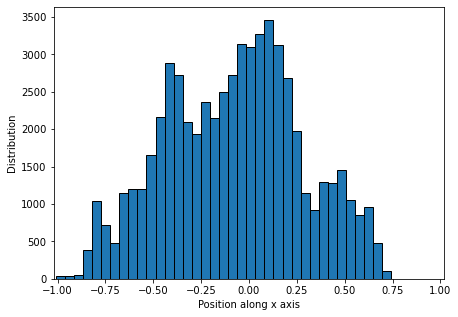

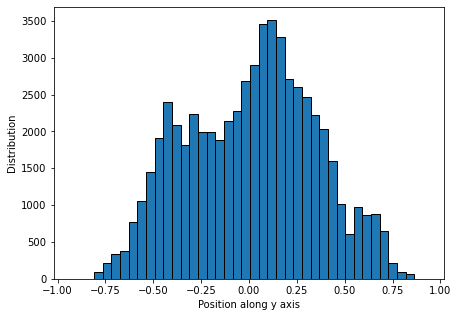

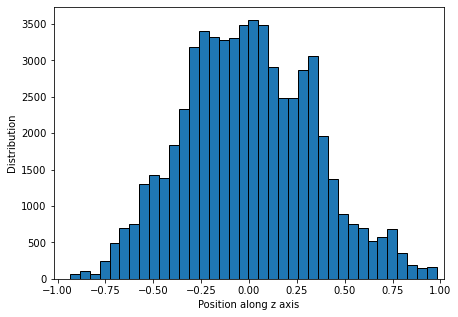

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# We look at distribution on x, y and z axis
rho_list = df['Rho'].to_numpy()
theta_list = df['Theta'].to_numpy()
phi_list = df['Phi'].to_numpy()

x_data = rho_list * np.cos(theta_list) * np.sin(phi_list)
y_data = rho_list * np.sin(theta_list) * np.sin(phi_list)
z_data = rho_list * np.cos(phi_list)


# Plot histogram
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
n, bins, patches = ax.hist(x_data, bins=37, density=False, edgecolor = "black", label = 'Simulation Histogram')
ax.set_xlabel('Position along x axis')
ax.set_ylabel('Distribution')
ax.set_xlim([-1.02, 1.02])
plt.show()

fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
n, bins, patches = ax.hist(y_data, bins=37, density=False, edgecolor = "black", label = 'Simulation Histogram')
ax.set_xlabel('Position along y axis')
ax.set_ylabel('Distribution')
ax.set_xlim([-1.02, 1.02])
plt.show()

fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
n, bins, patches = ax.hist(z_data, bins=37, density=False, edgecolor = "black", label = 'Simulation Histogram')
ax.set_xlabel('Position along z axis')
ax.set_ylabel('Distribution')
ax.set_xlim([-1.02, 1.02])
plt.show()